In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [45]:
data = pd.read_csv('/content/smoke_detection_iot.csv', delimiter=',')
dataset=data.values
print(dataset)
data.head() 

[[0.00000000e+00 1.65473333e+09 2.00000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.65473333e+09 2.00150000e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.00000000e+00 1.65473333e+09 2.00290000e+01 ... 0.00000000e+00
  2.00000000e+00 0.00000000e+00]
 ...
 [6.26270000e+04 1.65513005e+09 1.88670000e+01 ... 1.40000000e-02
  5.74100000e+03 0.00000000e+00]
 [6.26280000e+04 1.65513005e+09 1.90830000e+01 ... 1.40000000e-02
  5.74200000e+03 0.00000000e+00]
 [6.26290000e+04 1.65513005e+09 1.92990000e+01 ... 1.40000000e-02
  5.74300000e+03 0.00000000e+00]]


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [46]:
data.info()
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [47]:
data.drop('UTC', inplace=True, axis=1)
data.drop('CNT', inplace=True, axis=1)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.head() 

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [48]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,1.000000


In [49]:
data.shape


(62630, 13)

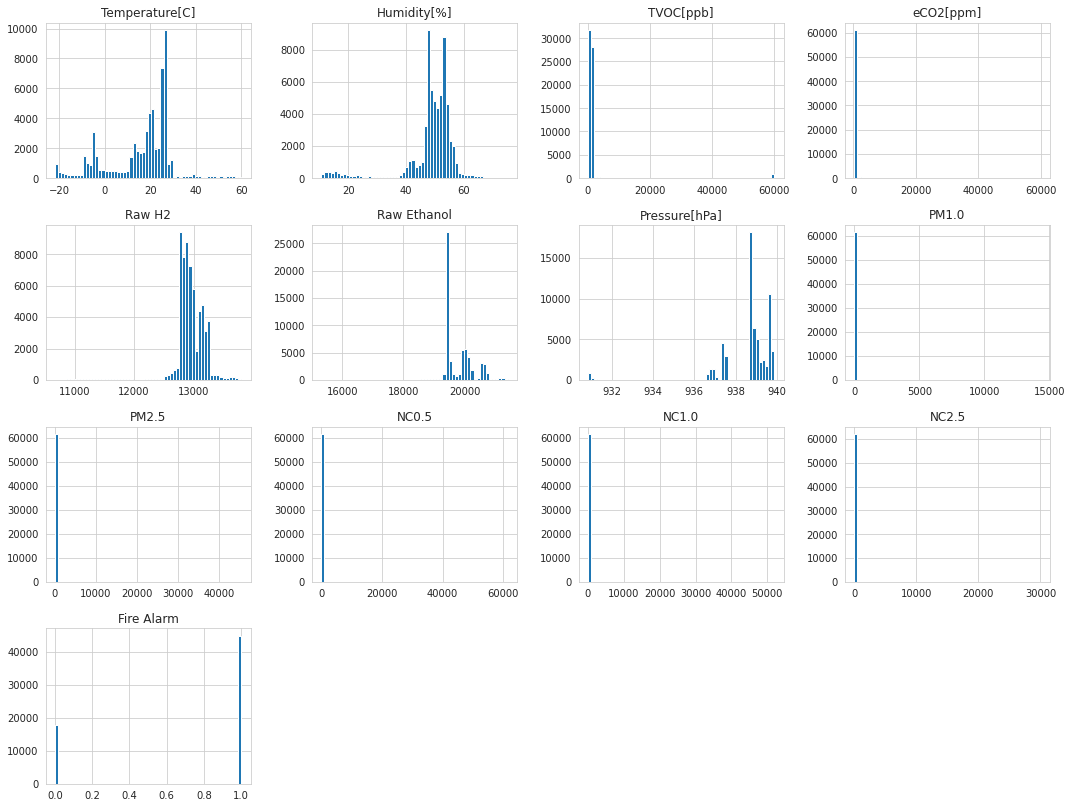

In [50]:
data.hist(bins=60, figsize=(18,14))
plt.show()

In [51]:
data.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [53]:
data.duplicated().sum()

2

In [54]:
data.drop_duplicates(inplace = True)

In [55]:
data.duplicated().sum()

0

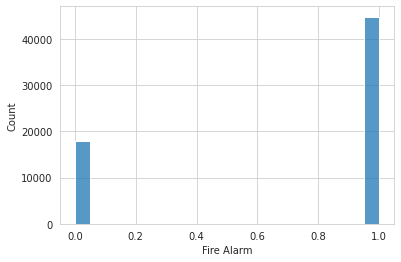

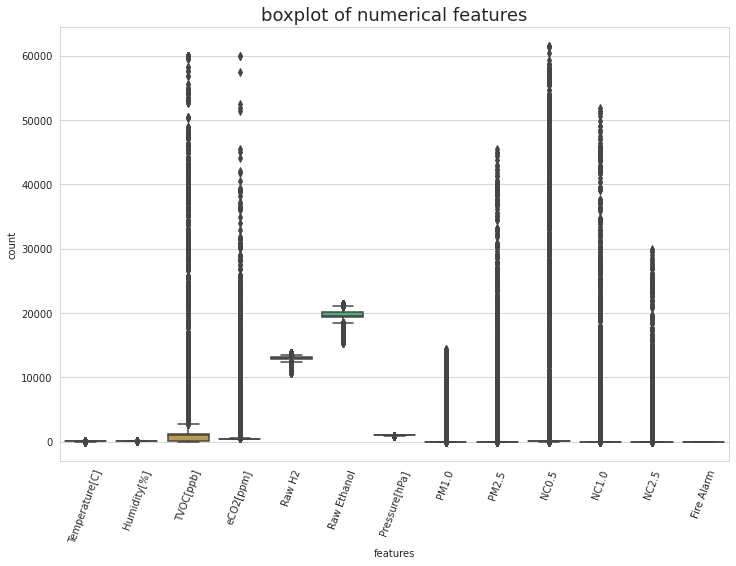

In [56]:
#EDA
sns.histplot(data['Fire Alarm'])

plt.figure(figsize=(12, 8))
sns.set_style(style="whitegrid")
sns.boxplot(data=data)

plt.xlabel('features')
plt.ylabel('count')
plt.title("boxplot of numerical features", fontsize=18)

plt.tick_params(axis='x', rotation=70)

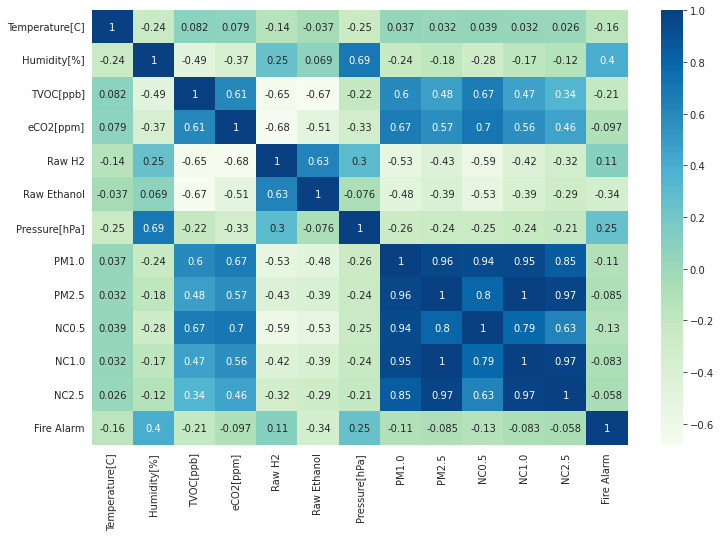

In [57]:
plt.figure(figsize = (12, 8))
sns.heatmap(data.corr(),annot = True,cmap = 'GnBu')

In [58]:
x=np.array(data.iloc[:,0:12])
print(x)

[[2.0000e+01 5.7360e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0015e+01 5.6670e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0029e+01 5.5960e+01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [1.8867e+01 1.5840e+01 6.2700e+02 ... 3.9500e+00 6.1700e-01 1.4000e-02]
 [1.9083e+01 1.6040e+01 6.3800e+02 ... 3.9200e+00 6.1100e-01 1.4000e-02]
 [1.9299e+01 1.6520e+01 6.4300e+02 ... 3.9000e+00 6.0700e-01 1.4000e-02]]


In [59]:
y=np.array(data.iloc[:,12])
print(y)

[0 0 0 ... 0 0 0]


In [60]:
model = Sequential()
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)
model.fit(X_train, y_train, epochs=50, batch_size=10)


Epoch 1/50
5011/5011 [==============================] - 12s 2ms/step - loss: 0.1772 - accuracy: 0.9580
Epoch 2/50
5011/5011 [==============================] - 10s 2ms/step - loss: 0.1329 - accuracy: 0.9606
Epoch 3/50
5011/5011 [==============================] - 10s 2ms/step - loss: 0.1229 - accuracy: 0.9649
Epoch 4/50
5011/5011 [==============================] - 10s 2ms/step - loss: 0.1224 - accuracy: 0.9649
Epoch 5/50
5011/5011 [==============================] - 11s 2ms/step - loss: 0.1191 - accuracy: 0.9664
Epoch 6/50
5011/5011 [==============================] - 11s 2ms/step - loss: 0.1523 - accuracy: 0.9664
Epoch 7/50
5011/5011 [==============================] - 11s 2ms/step - loss: 0.1789 - accuracy: 0.9675
Epoch 8/50
5011/5011 [==============================] - 10s 2ms/step - loss: 0.1130 - accuracy: 0.9683
Epoch 9/50
5011/5011 [==============================] - 11s 2ms/step - loss: 0.1090 - accuracy: 0.9698
Epoch 10/50
5011/5011 [==============================] - 10s 2ms/step - l

In [68]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1566/1566 [==============================] - 2s 2ms/step - loss: 0.0495 - accuracy: 0.9839
Accuracy: 98.39


In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                650       
                                                                 
 dense_10 (Dense)            (None, 30)                1530      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,211
Trainable params: 2,211
Non-trainable params: 0
_________________________________________________________________
